# Sentiment Analysis with Logistic Regression

This gives a simple example of explaining a linear logistic regression sentiment analysis model using shap. Note that with a linear model the SHAP value for feature i for the prediction $f(x)$ (assuming feature independence) is just $\phi_i = \beta_i \cdot (x_i - E[x_i])$. Since we are explaining a logistic regression model the units of the SHAP values will be in the log-odds space.

The dataset we use is the classic IMDB dataset from [this paper](http://www.aclweb.org/anthology/P11-1015). It is interesting when explaining the model how the words that are absent from the text are sometimes just as important as those that are present.

In [1]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap

shap.initjs()

## Load the IMDB dataset

In [2]:
# !wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("imdb_dataset.csv",on_bad_lines="skip")

In [5]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [6]:
corpus,y = data["review"],data["sentiment"]

In [7]:
# corpus,y = shap.datasets.imdb()
corpus_train, corpus_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=7)

vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(corpus_train).toarray() # sparse also works but Explanation slicing is not yet supported
X_test = vectorizer.transform(corpus_test).toarray()

## Fit a linear logistic regression model

In [8]:
model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train, y_train)

LogisticRegression(C=0.1)

## Explain the linear model

In [9]:
explainer = shap.Explainer(model, X_train, feature_names=vectorizer.get_feature_names())
shap_values = explainer(X_test)

Linear explainer: 10001it [00:18, 269.73it/s]                           


### Summarize the effect of all the features

AssertionError: Feature and SHAP matrices must have the same number of rows!

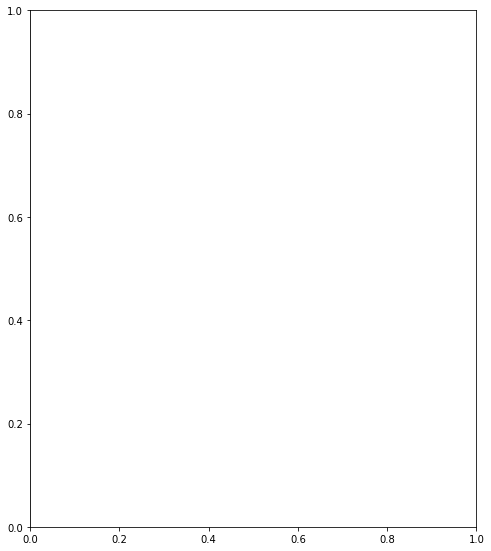

In [10]:
shap.summary_plot(shap_values, X_train)

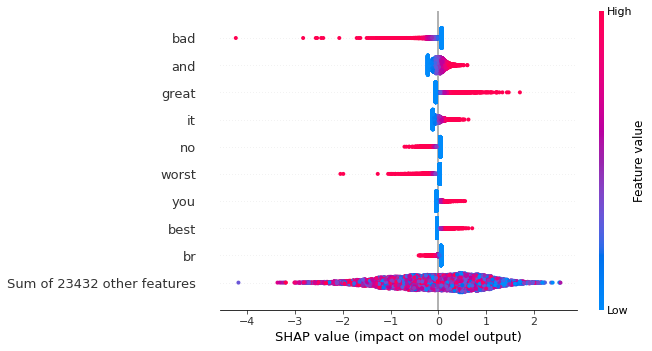

In [ ]:

shap.plots.beeswarm(shap_values)#, X_test_array, feature_names=vectorizer.get_feature_names())

### Explain the first review's sentiment prediction

Remember that higher means more likely to be negative, so in the plots below the "red" features are actually helping raise the chance of a positive review, while the negative features are lowering the chance. It is interesting to see how what is not present in the text (like bad=0 below) is often just as important as what is in the text. Remember the values of the features are TF-IDF values.

In [63]:
ind = 0
shap.plots.force(shap_values[ind])

In [64]:
y_test.reset_index(inplace = True,drop = True)

In [66]:
y_test

0       negative
1       positive
2       positive
3       negative
4       positive
          ...   
9995    negative
9996    positive
9997    positive
9998    negative
9999    negative
Name: sentiment, Length: 10000, dtype: object

In [68]:
corpus_test.reset_index(inplace = True,drop = True)

In [69]:
print("Positive" if y_test[ind] else "Negative", "Review:")
print(corpus_test[ind])

Positive Review:
I love most movies and I'm a big fan of Sean Bean so I thought that I would at least LIKE this movie. Also, I'm Canadian and this is a mostly-Canadian movie so I was prepared to cut it some serious slack. Nothing could have prepared me for the garbage that is "Airborne". Steve Guttenberg as an action hero? Give me a break. The acting throughout the movie was so bad I am going to have trouble sleeping tonight. I now have only two wishes in my life.<br /><br />1. I hope that you never have to sit through this movie. 2. I wish I could get those 6 hours back. Oh wait, the movie's under 2 hours - it only seemed like 6 hours...<br /><br />Don't watch this. Seriously.


### Explain the second review's sentiment prediction

In [70]:
ind = 1
shap.plots.force(shap_values[ind])

In [71]:
ind

1

In [72]:
y_test

0       negative
1       positive
2       positive
3       negative
4       positive
          ...   
9995    negative
9996    positive
9997    positive
9998    negative
9999    negative
Name: sentiment, Length: 10000, dtype: object

In [73]:
y_test[2]

'positive'

In [74]:
print("Positive" if y_test[ind] else "Negative", "Review:")
print(corpus_test[ind])

Positive Review:
A film that tends to get buried under prejudice and preconception - It's a remake! Doris Day is in it! She sings! - Hitchcock's second crack at 'The Man Who Knew Too Much' is his most under-rated film, and arguably a fully fledged masterpiece in its own right.<br /><br />This is, in more ways than one, Doris Day's film. Not only does she give the finest performance of her career, more than holding her own against James Stewart, but the whole film is subtly structured around her character rather than his. This is, after all, a film in which music is both motif and plot device. What better casting than the most popular singer of her generation? Consider: Day's Jo McKenna has given up her career on the stage in order to settle down with her husband and raise their son. This seems to be a mutual decision, and she doesn't appear to be unhappy. But look at the way Stewart teases her in the horse-drawn carriage over her concerns about Louis Bernard, implying that she is jealo

### Explain the third review's sentiment prediction

In [75]:
ind = 2
shap.plots.force(shap_values[ind])

In [76]:
print("Positive" if y_test[ind] else "Negative", "Review:")
print(corpus_test[ind])

Positive Review:
Howard Brackett (Kevin Kline) is a teacher who is about to get married. Then, one of his former students wins an Oscar for a film in which he plays a gay soldier and thanks Howard in his acceptance speech, outing him as being gay too! This film follows the aftermath as reporters descend on Howard's village and he tries to convince everyone that he is straight.<br /><br />I love this movie! Kevin Kline is wonderful, it has some really hilarious moments and it always leaves me feeling great with an enormous grin on my face. Consequently, it's one film that I enjoy watching as often as possible. If you haven't seen it, you're missing out!
